# Pitch-Invariant Log-Spectral Envelope (PILSE)

## 01. Assumption and observations

**Assumption**: a log-spectrum, such as the CQT-spectrum, can be represented as to the convolution of a pitch-invariant log-spectal envelope component (~ timbre) and a envelope-normalized pitch component.

`X = E * P`

**Observation 1**: A pitch change in audio translates to a linear shift in the log-spectrum. 

This means that the same musical object at different pitches should have a similar envelope component but a shifted pitch component; while two different musical objects at the same pitch should have different envelope components but a similar pitch component.

- `X = E * P`

- `X2 = E2 * P2`

`=> E ~ E2`

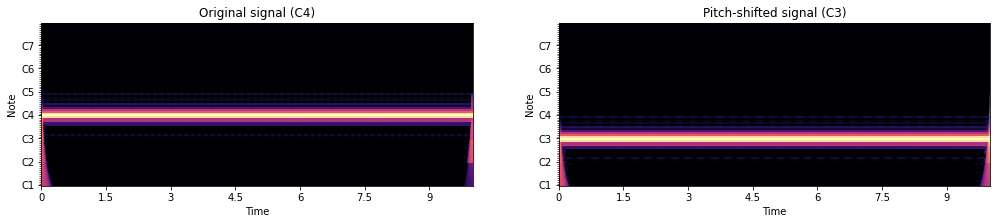

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define two sinusoids, one twice lower in frequency than the other one
sampling_frequency = 44100                                     # In Hz
time_duration = 10                                             # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
frequency_value1 = 261.63                                      # In Hz
frequency_value2 = frequency_value1/2                          # In Hz
audio_signal1 = np.sin(time_array*2*np.pi*frequency_value1)
audio_signal2 = np.sin(time_array*2*np.pi*frequency_value2)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their power CQT-spectrogram in seconds and notes
plt.figure(figsize=(17, 3))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram, ref=np.max), \
                         sr=sampling_frequency, hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.title("Original signal (C4)")
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), \
                         sr=sampling_frequency, hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.title("Pitch-shifted signal (C3)")
plt.show()

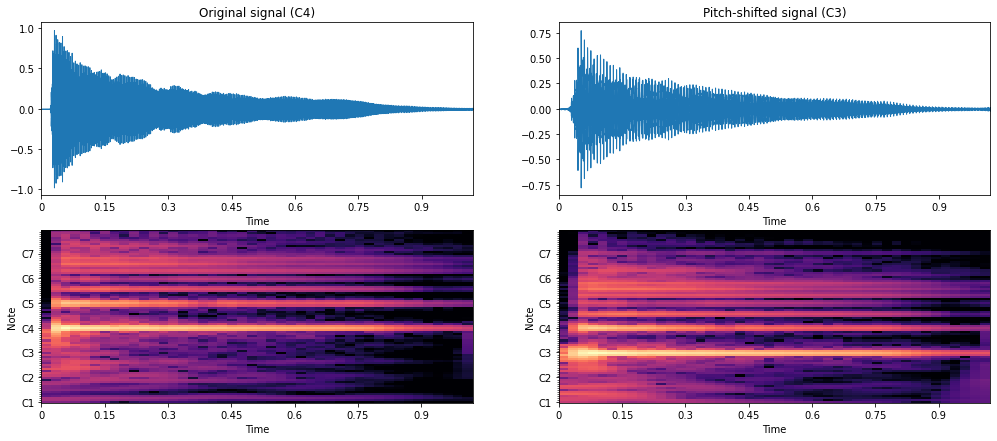

In [6]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r"94812__digifishmusic__c4-major-scale-piano.wav"
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT-spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title("Original signal (C4)")
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title("Pitch-shifted signal (C3)")
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), \
                         sr=sampling_frequency, hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), \
                         sr=sampling_frequency, hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

**Observation 2**: The Fourier transform (FT) of a convolution is equal to the product of the FTs (convolution theorem).

- `F(X) = F(E) x F(P)`

- `F(X2) = F(E2) x F(P2)`

`=> F(E) ~ F(E2)`

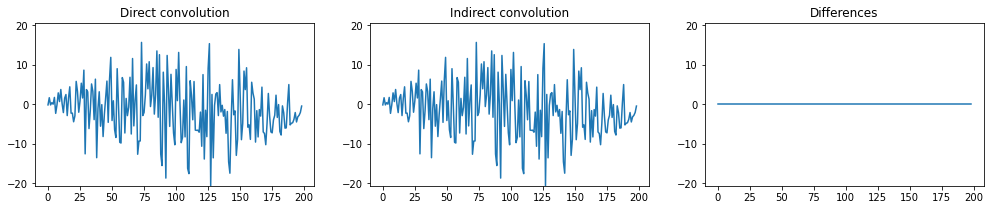

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define two arrays
number_elements = 100
data_array1 = np.random.normal(size=number_elements)
data_array2 = np.random.normal(size=number_elements)

# Compute the direct convolution between them
data_convolution = np.convolve(data_array1, data_array2)

# Compute the convolution using the convolution theorem
ft_array1 = np.fft.fft(data_array1, 2*number_elements-1)
ft_array2 = np.fft.fft(data_array2, 2*number_elements-1)
data_convolution2 = np.real(np.fft.ifft(ft_array1*ft_array2))

# Display the convolutions and their differences
maximum_value = max(abs(data_convolution))
plt.figure(figsize=(17, 3))
plt.subplot(1, 3, 1)
plt.plot(data_convolution), plt.ylim(-maximum_value, maximum_value), plt.title("Direct convolution")
plt.subplot(1, 3, 2)
plt.plot(data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title("Indirect convolution")
plt.subplot(1, 3, 3)
plt.plot(data_convolution-data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title("Differences")
plt.show()

**Observation 3**: The magnitude FT is shift-invariant.

- `F(X) = abs(F(X)) x exp(j*angle(F(X)))`

- `F(X2) = abs(F(X2)) x exp(j*angle(F(X2)))`

`=> abs(F(X)) ~ abs(F(X2))`

`=> F(E) ~ abs(F(X)) => E ~ F-1(abs(F(X))) and P ~ F-1(exp(j*angle(F(X))))`

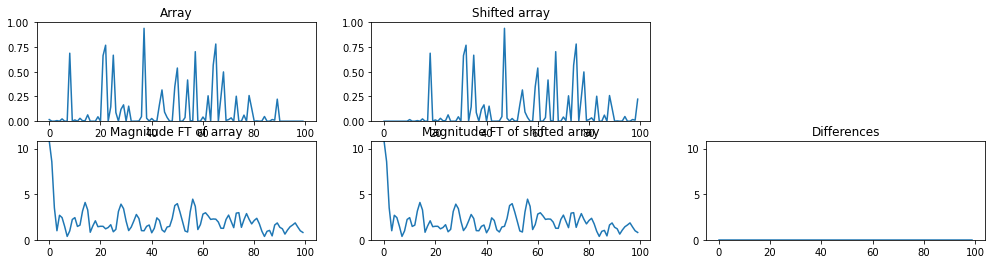

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-negative array and a shifted version of it
number_elements = 100
delay_size = 10
data_array1 = np.concatenate((np.power(np.random.rand(number_elements-delay_size), 10), np.zeros(delay_size)))
data_array2 = np.concatenate((np.zeros(delay_size), data_array1[0:number_elements-delay_size]))

# Compute the magnitude FT of the arrays
absft_array1 = abs(np.fft.fft(data_array1, 2*number_elements-1))[0:number_elements]
absft_array2 = abs(np.fft.fft(data_array2, 2*number_elements-1))[0:number_elements]

# Display the arrays and magnitude FTs
maximum_value = max(np.max(absft_array1), np.max(absft_array2))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(data_array1), plt.ylim(0, 1), plt.title("Array")
plt.subplot(2, 3, 2), plt.plot(data_array2), plt.ylim(0, 1), plt.title("Shifted array")
plt.subplot(2, 3, 4), plt.plot(absft_array1), plt.ylim(0, maximum_value), plt.title("Magnitude FT of array")
plt.subplot(2, 3, 5), plt.plot(absft_array2), plt.ylim(0, maximum_value), plt.title("Magnitude FT of shifted array")
plt.subplot(2, 3, 6), plt.plot(abs(absft_array1-absft_array2)), plt.ylim(0, maximum_value), plt.title("Differences")
plt.show()

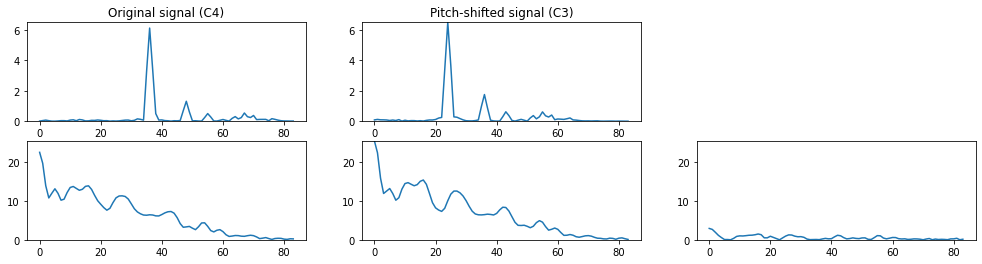

In [9]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r"94812__digifishmusic__c4-major-scale-piano.wav"
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))
number_frequencies = np.shape(audio_spectrogram1)[0]

# Compute the magnitude FT of the CQT-spectrograms
absft_spectrogram1 = abs(np.fft.fft(audio_spectrogram1, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]
absft_spectrogram2 = abs(np.fft.fft(audio_spectrogram2, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]

# Display their waveform in seconds and their power CQT-spectrogram in seconds and notes
i = 10
audio_maximum = max(np.max(abs(audio_spectrogram1[:, i])), np.max(abs(audio_spectrogram2[:, i])))
absft_maximum = max(np.max(abs(absft_spectrogram1[:, i])), np.max(abs(absft_spectrogram2[:, i])))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(audio_spectrogram1[:, i]), plt.ylim(0, audio_maximum), plt.title("Original signal (C4)")
plt.subplot(2, 3, 2), plt.plot(audio_spectrogram2[:, i]), plt.ylim(0, audio_maximum), plt.title("Pitch-shifted signal (C3)")
plt.subplot(2, 3, 4), plt.plot(absft_spectrogram1[:, i]), plt.ylim(0, absft_maximum)
plt.subplot(2, 3, 5), plt.plot(absft_spectrogram2[:, i]), plt.ylim(0, absft_maximum)
plt.subplot(2, 3, 6), plt.plot(abs(absft_spectrogram1[:, i]-absft_spectrogram2[:, i])), plt.ylim(0, absft_maximum)
plt.show()

## 02. Decompose the magnitude CQT-spectrogram into an envelope and pitch component

C:\Users\raza7002\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\raza7002\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


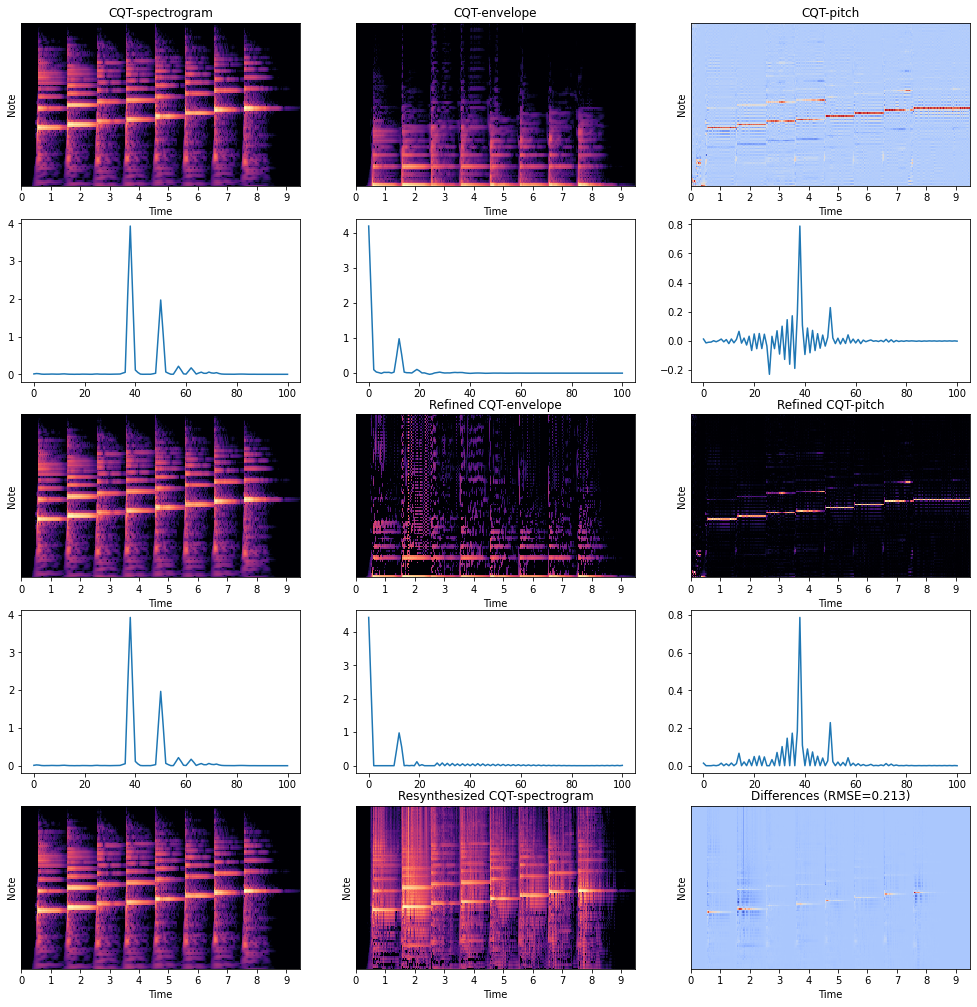

In [29]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r"94812__digifishmusic__c4-major-scale-piano.wav"
# file_path = r"557469__oleviolin__d-scale-violin.wav"
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
if audio_signal.ndim == 2:
    audio_signal = audio_signal[0, :]

# Comptute the CQT-spectrogram for the signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/4
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
audio_cqt = librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                        n_bins=number_frequencies, bins_per_octave=octave_resolution)
audio_spectrogram = np.abs(audio_cqt)
number_times = np.shape(audio_spectrogram)[1]

# Compute the envelope and the pitch components
ft_spectrogram = np.fft.fft(audio_spectrogram, 2*number_frequencies-1, axis=0)
absft_spectrogram = abs(ft_spectrogram)
envelope_component = np.real(np.fft.ifft(absft_spectrogram, axis=0)[0:number_frequencies, :])
pitch_component = np.real(np.fft.ifft(ft_spectrogram/absft_spectrogram, axis=0)[0:number_frequencies, :])

# Refine the envelope and the pitch components
pitch_component2 = np.copy(pitch_component)
pitch_component2[pitch_component2 < 0] = 0
envelope_component2 \
= np.real(np.fft.ifft(ft_spectrogram/(np.fft.fft(pitch_component2, 2*number_frequencies-1, axis=0)+1e-6), axis=0)\
          [0:number_frequencies, :])
envelope_component2[envelope_component2 < 0] = 0

# Resynthesize the spectrogram by convolving the refined envelope and the pitch component
audio_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    audio_spectrogram2[:, i] = np.convolve(envelope_component2[:, i], pitch_component2[:, i])[0:number_frequencies]
audio_spectrogram2 = np.real(audio_spectrogram2)
audio_spectrogram2[audio_spectrogram2 < 0] = 0

# # Resynthesize the signal
# audio_signal2 = librosa.icqt(audio_spectrogram2*audio_cqt/audio_spectrogram, sr=sampling_frequency, \
#                              hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
# audio_signal2 = np.max(abs(audio_signal))*audio_signal2/np.max(abs(audio_signal2))
# audio_signal2 = np.pad(audio_signal2, (0, len(audio_signal)-len(audio_signal2)), 'constant', constant_values=0)

# Display the original specrogram, the envelope and pitch component, the resynthesized spectrogram, and the differences
i = 100
rmse_value = np.round(np.sqrt(np.mean(np.power(audio_spectrogram-audio_spectrogram2, 2))), 3)
plt.figure(figsize=(17, 21))
plt.subplot(6, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title("CQT-spectrogram")
plt.subplot(6, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(envelope_component, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title("CQT-envelope")
plt.subplot(6, 3, 3)
librosa.display.specshow(pitch_component, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title("CQT-pitch")
plt.subplot(6, 3, 4)
plt.plot(audio_spectrogram[:, i])
plt.subplot(6, 3, 5)
plt.plot(envelope_component[:, i])
plt.subplot(6, 3, 6)
plt.plot(pitch_component[:, i])
plt.subplot(6, 3, 7)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.subplot(6, 3, 8)
librosa.display.specshow(librosa.amplitude_to_db(envelope_component2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title("Refined CQT-envelope")
plt.subplot(6, 3, 9)
librosa.display.specshow(pitch_component2, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title("Refined CQT-pitch")
plt.subplot(6, 3, 10)
plt.plot(audio_spectrogram[:, i])
plt.subplot(6, 3, 11)
plt.plot(envelope_component2[:, i])
plt.subplot(6, 3, 12)
plt.plot(pitch_component2[:, i])
plt.subplot(6, 3, 13)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.subplot(6, 3, 14)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title("Resynthesized CQT-spectrogram")
plt.subplot(6, 3, 15)
librosa.display.specshow(audio_spectrogram-audio_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title(f"Differences (RMSE={rmse_value})")
plt.show()

## 03. Compare PILSE to MFCCs

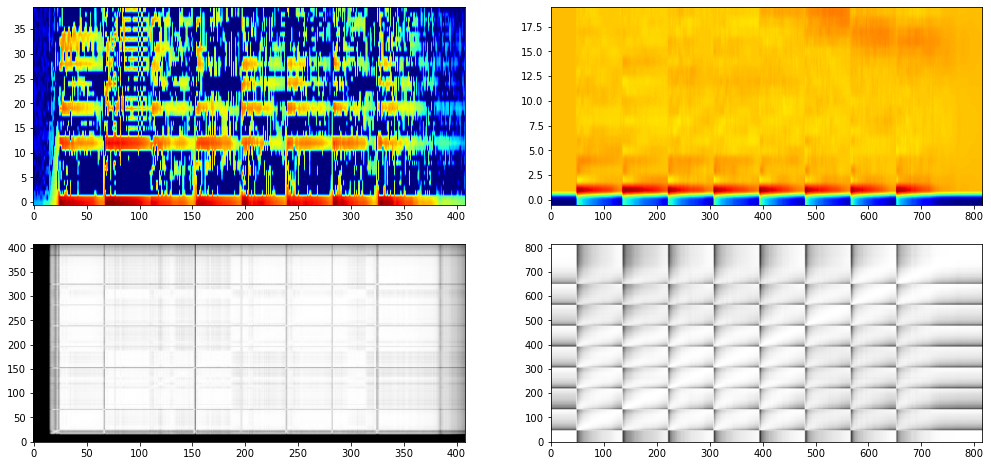

In [52]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define a function to estimate the pitch-invariant log spectral envelope
def pilse(audio_spectrogram):
    
    # Compute the FT of the columns in the spectrogram and its magnitude
    number_frequencies = np.shape(audio_spectrogram)[0]
    ft_spectrogram = np.fft.fft(audio_spectrogram, 2*number_frequencies-1, axis=0)
    absft_spectrogram = abs(ft_spectrogram)
    
    # Derive the envelope and pitch components
    envelope_component = np.real(np.fft.ifft(absft_spectrogram, axis=0)[0:number_frequencies, :])
    pitch_component = np.real(np.fft.ifft(ft_spectrogram/absft_spectrogram, axis=0)[0:number_frequencies, :])
    
    # Refine the envelope and pitch components
    pitch_component[pitch_component < 0] = 0
    envelope_component \
    = np.real(np.fft.ifft(ft_spectrogram/(np.fft.fft(pitch_component, 2*number_frequencies-1, axis=0)+1e-6), axis=0)\
              [0:number_frequencies, :])
    envelope_component[envelope_component < 0] = 0
    
    return envelope_component, pitch_component


# Define a function to compute a self-similarity matrix using the cosine similarity
def ssm(audio_feature):
    
    # Normalize the columns by their Euclidean norm
    audio_feature0 = audio_feature/(np.sqrt(np.sum(np.power(audio_feature, 2), axis=0))+0.001)
    
    # Multiple the normalized columns with each other
    similarity_matrix = np.matmul(audio_feature0.T, audio_feature0)
    
    return similarity_matrix
    
    
# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r"94812__digifishmusic__c4-major-scale-piano.wav"
# file_path = r"557469__oleviolin__d-scale-violin.wav"
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
if audio_signal.ndim == 2:
    audio_signal = audio_signal[0, :]
    
# Comptute the CQT-spectrogram for the signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/4
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
audio_cqt = librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                        n_bins=number_frequencies, bins_per_octave=octave_resolution)
audio_spectrogram = np.abs(audio_cqt)
number_times = np.shape(audio_spectrogram)[1]

# Compute the envelope and pitch components
envelope_component, pitch_component = pilse(audio_spectrogram)

# Compute the self-similarity matrix using the cosine similarity
similarity_matrix = ssm(envelope_component[0:40, :])

# Compute the MFCCs
audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_mfcc=20)

# Compute the self-similarity matrix using the cosine similarity
similarity_matrix2 = ssm(audio_mfcc)

# ... 
plt.figure(figsize=(17, 8))
plt.subplot(2, 2, 1)
plt.imshow(20*np.log10(envelope_component[0:40, :]+1e-6), cmap="jet", aspect="auto", origin="lower")
plt.subplot(2, 2, 2)
plt.imshow(audio_mfcc, cmap="jet", aspect="auto", origin="lower")
plt.subplot(2, 2, 3)
plt.imshow(similarity_matrix, cmap="gray", aspect="auto", origin="lower", vmin=0.5, vmax=1)
plt.subplot(2, 2, 4)
plt.imshow(similarity_matrix2, cmap="gray", aspect="auto", origin="lower", vmin=0.5, vmax=1)
plt.show()

## 04. Test PILSE on a small dataset

In [105]:
import os
from shutil import copyfile

# Create a small dataset from the large NSynth dataset
folder_path = r"C:\Users\raza7002\Downloads\nsynth\nsynth-train\audio"
folder_path2 = r"C:\Users\raza7002\Documents\GitHub\PILSE-Python\nsynth0"
instrument_list = [{"name":"bass_acoustic", "number": "000", "midi": 24}, \
                   {"name":"brass_acoustic", "number": "000", "midi": 60}, \
                   {"name":"flute_acoustic", "number": "000", "midi": 60}, \
                   {"name":"guitar_acoustic", "number": "000", "midi": 60}, \
                   {"name":"keyboard_acoustic", "number": "000", "midi": 60}, \
                   {"name":"mallet_acoustic", "number": "000", "midi": 72}, \
                   {"name":"organ_electronic", "number": "000", "midi": 60}, \
                   {"name":"reed_acoustic", "number": "000", "midi": 60}, \
                   {"name":"string_acoustic", "number": "000", "midi": 60}, \
                   {"name":"synth_lead_synthetic", "number": "000", "midi": 60}, \
                   {"name":"vocal_acoustic", "number": "002", "midi": 60}]

number_semitones = 12
for i in instrument_list:
    for j in range(i["midi"], i["midi"]+number_semitones):
        file_name = f"{i['name']}_{i['number']}-{j:03d}-075.wav"
        file_path = os.path.join(folder_path, file_name)
        file_path2 = os.path.join(folder_path2, file_name)
        copyfile(file_path, file_path2)